In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Standardizasyonu

In [39]:
# Seaborn 'tips' veri setini yükledim
tips = sns.load_dataset('tips')

data = tips[['total_bill', 'tip']]

# Ortalama ve standart sapma
mean = data.mean()
std = data.std()

data_standardized = (data - mean) / std

print("Standardize Edilmiş Veri:\n", data_standardized.head())

Standardize Edilmiş Veri:
    total_bill       tip
0   -0.314066 -1.436993
1   -1.061054 -0.967217
2    0.137497  0.362610
3    0.437416  0.225291
4    0.539635  0.442111


# Veri Normalizasyonu

In [40]:
# Min ve Max değerleri
min_value = data.min()
max_value = data.max()

# Normalizasyon (veriyi 0 ile 1 arasında dönüştürme)
data_normalized = (data - min_value) / (max_value - min_value)

print("Normalleştirilmiş Veri:\n", data_normalized.head())


Normalleştirilmiş Veri:
    total_bill       tip
0    0.291579  0.001111
1    0.152283  0.073333
2    0.375786  0.277778
3    0.431713  0.256667
4    0.450775  0.290000


# Veri Görselleştirme

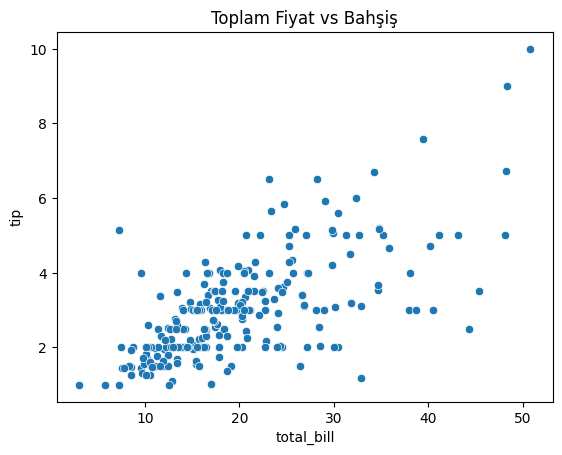

In [41]:
# Seaborn ile veri görselleştirme
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Toplam Fiyat vs Bahşiş')
plt.show()

<ipython-input-42-92968de190fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')


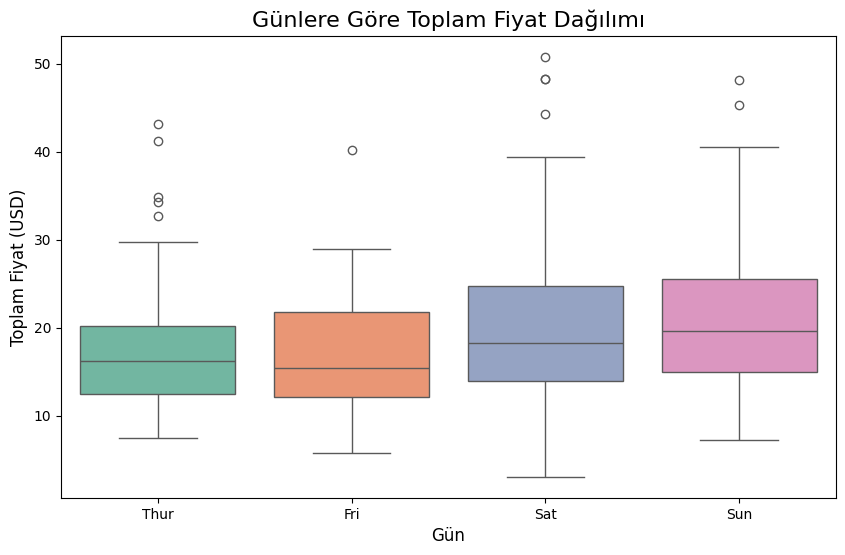

In [42]:
# Boxplot ile 'total_bill' ve 'tip' sütunlarının dağılımı
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')

plt.title('Günlere Göre Toplam Fiyat Dağılımı', fontsize=16)
plt.xlabel('Gün', fontsize=12)
plt.ylabel('Toplam Fiyat (USD)', fontsize=12)

plt.show()

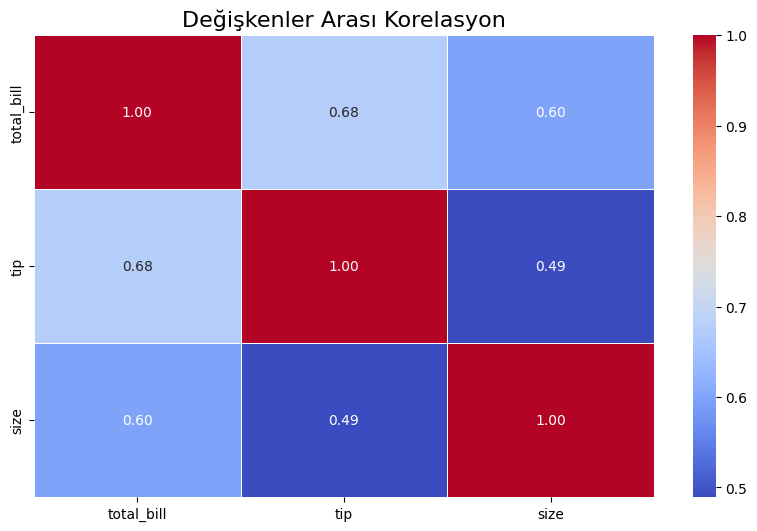

In [43]:
# Korelasyın matrisi hesaplamak için sadece sayısal sütunları seçtim
numeric_columns = tips.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi hesaplama
corr_matrix = numeric_columns.corr()

# Isı haritası ile korelasyonları görselleştirdim
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


plt.title('Değişkenler Arası Korelasyon', fontsize=16)

plt.show()

# GroupBy ile Veri Gruplama

In [44]:
# GroupBy ile günlere göre ortalama bahşiş hesapladım
grouped_by_day = tips.groupby('day')['tip'].mean()

print("Günlere Göre Ortalama Bahşiş:\n", grouped_by_day)


Günlere Göre Ortalama Bahşiş:
 day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


<ipython-input-44-786f3a51fba3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_day = tips.groupby('day')['tip'].mean()


<ipython-input-45-22c6a9fa3d05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_by_day.index, y=grouped_by_day.values, palette='Set2')


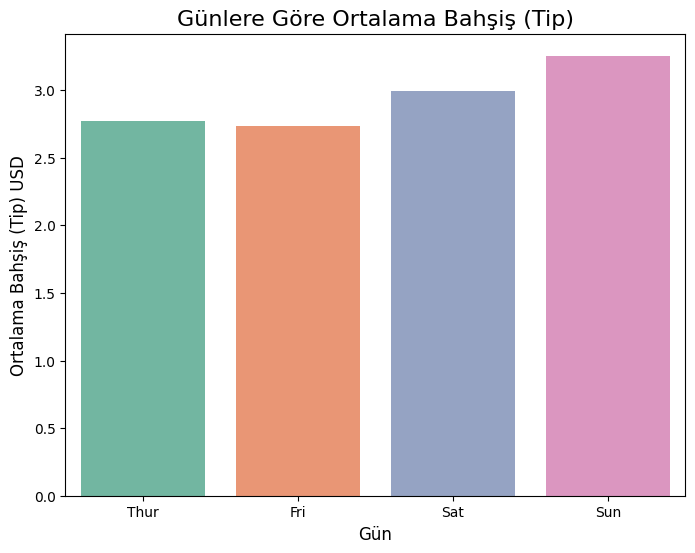

In [45]:
# Görselleştirme: Günlere göre ortalama bahşişi bar plot ile çizdim
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_by_day.index, y=grouped_by_day.values, palette='Set2')

plt.title('Günlere Göre Ortalama Bahşiş (Tip)', fontsize=16)
plt.xlabel('Gün', fontsize=12)
plt.ylabel('Ortalama Bahşiş (Tip) USD', fontsize=12)

plt.show()

In [46]:
# Cinsiyete göre toplam fatura ortalamasını hesapladım
grouped_by_gender = tips.groupby('sex')['total_bill'].mean()

print("Cinsiyete Göre Ortalama Toplam Fiyat (Total Bill):\n", grouped_by_gender)

Cinsiyete Göre Ortalama Toplam Fiyat (Total Bill):
 sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64


<ipython-input-46-91f2ac8c87a6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_gender = tips.groupby('sex')['total_bill'].mean()


<ipython-input-47-1774a0f6363f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_by_gender.index, y=grouped_by_gender.values, palette='Set1')


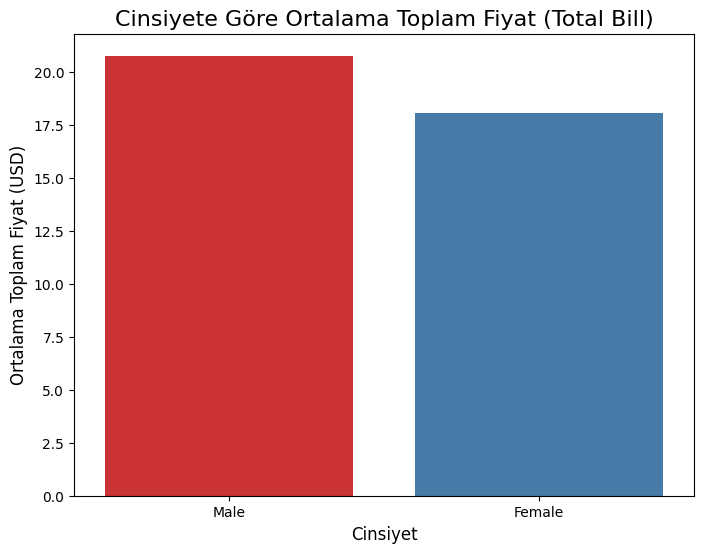

In [47]:
# Görselleştirme: Cinsiyete göre ortalama toplam fatura miktarını bar plot ile çizdim
plt.figure(figsize=(8, 6))
sns.barplot(x=grouped_by_gender.index, y=grouped_by_gender.values, palette='Set1')

plt.title('Cinsiyete Göre Ortalama Toplam Fiyat (Total Bill)', fontsize=16)
plt.xlabel('Cinsiyet', fontsize=12)
plt.ylabel('Ortalama Toplam Fiyat (USD)', fontsize=12)

plt.show()

# Select ile Veri Seçme

In [48]:
# 'total_bill' ve 'tip' sütunlarını seçme
selected_columns = tips[['total_bill', 'tip']]

print("Seçilen Sütunlar:\n", selected_columns.head())


Seçilen Sütunlar:
    total_bill   tip
0       16.99  1.01
1       10.34  1.66
2       21.01  3.50
3       23.68  3.31
4       24.59  3.61


# Where ile Filtreleme

In [49]:
# Bahşişi 3'ten büyük olan verileri seçme
filtered_data = tips[tips['tip'] > 3]

print("Bahşişi 3'ten Büyük Olan Veriler:\n", filtered_data)


Bahşişi 3'ten Büyük Olan Veriler:
      total_bill   tip     sex smoker  day    time  size
2         21.01  3.50    Male     No  Sun  Dinner     3
3         23.68  3.31    Male     No  Sun  Dinner     2
4         24.59  3.61  Female     No  Sun  Dinner     4
5         25.29  4.71    Male     No  Sun  Dinner     4
7         26.88  3.12    Male     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
219       30.14  3.09  Female    Yes  Sat  Dinner     4
221       13.42  3.48  Female    Yes  Fri   Lunch     2
232       11.61  3.39    Male     No  Sat  Dinner     2
238       35.83  4.67  Female     No  Sat  Dinner     3
239       29.03  5.92    Male     No  Sat  Dinner     3

[98 rows x 7 columns]


In [50]:
# Yalnızca Pazar günü olanları filtreledim
sunday_data = tips.where(tips['day'] == 'Sun').dropna()

print("Pazar Gününe Ait Veriler:\n", sunday_data)

Pazar Gününe Ait Veriler:
      total_bill   tip     sex smoker  day    time  size
0         16.99  1.01  Female     No  Sun  Dinner   2.0
1         10.34  1.66    Male     No  Sun  Dinner   3.0
2         21.01  3.50    Male     No  Sun  Dinner   3.0
3         23.68  3.31    Male     No  Sun  Dinner   2.0
4         24.59  3.61  Female     No  Sun  Dinner   4.0
..          ...   ...     ...    ...  ...     ...   ...
186       20.90  3.50  Female    Yes  Sun  Dinner   3.0
187       30.46  2.00    Male    Yes  Sun  Dinner   5.0
188       18.15  3.50  Female    Yes  Sun  Dinner   3.0
189       23.10  4.00    Male    Yes  Sun  Dinner   3.0
190       15.69  1.50    Male    Yes  Sun  Dinner   2.0

[76 rows x 7 columns]


In [51]:
# Toplam fiyatı 20 USD'den fazla olan ve sigara içmeyenleri filtreledim
filtered_data = tips.where((tips['total_bill'] > 20) & (tips['smoker'] == 'No')).dropna()

print("Toplam Fiyatı 20 USD'den Fazla Olan ve Sigara İçmeyen Kayıtlar:\n", filtered_data)


Toplam Fiyatı 20 USD'den Fazla Olan ve Sigara İçmeyen Kayıtlar:
      total_bill   tip     sex smoker   day    time  size
2         21.01  3.50    Male     No   Sun  Dinner   3.0
3         23.68  3.31    Male     No   Sun  Dinner   2.0
4         24.59  3.61  Female     No   Sun  Dinner   4.0
5         25.29  4.71    Male     No   Sun  Dinner   4.0
7         26.88  3.12    Male     No   Sun  Dinner   4.0
11        35.26  5.00  Female     No   Sun  Dinner   4.0
15        21.58  3.92    Male     No   Sun  Dinner   2.0
19        20.65  3.35    Male     No   Sat  Dinner   3.0
21        20.29  2.75  Female     No   Sat  Dinner   2.0
23        39.42  7.58    Male     No   Sat  Dinner   4.0
28        21.70  4.30    Male     No   Sat  Dinner   2.0
33        20.69  2.45  Female     No   Sat  Dinner   4.0
35        24.06  3.60    Male     No   Sat  Dinner   3.0
39        31.27  5.00    Male     No   Sat  Dinner   3.0
44        30.40  5.60    Male     No   Sun  Dinner   4.0
46        22.23  5.00  

# Query ile Filtreleme

In [52]:
# Query ile 'tip' > 3 olan verileri seçme
filtered_query = tips.query('tip > 3')

print("Query ile Filtrelenmiş Veri:\n", filtered_query)


Query ile Filtrelenmiş Veri:
      total_bill   tip     sex smoker  day    time  size
2         21.01  3.50    Male     No  Sun  Dinner     3
3         23.68  3.31    Male     No  Sun  Dinner     2
4         24.59  3.61  Female     No  Sun  Dinner     4
5         25.29  4.71    Male     No  Sun  Dinner     4
7         26.88  3.12    Male     No  Sun  Dinner     4
..          ...   ...     ...    ...  ...     ...   ...
219       30.14  3.09  Female    Yes  Sat  Dinner     4
221       13.42  3.48  Female    Yes  Fri   Lunch     2
232       11.61  3.39    Male     No  Sat  Dinner     2
238       35.83  4.67  Female     No  Sat  Dinner     3
239       29.03  5.92    Male     No  Sat  Dinner     3

[98 rows x 7 columns]


In [53]:
# Toplam fiyatı 20 USD'den fazla olan ve sigara içmeyenleri filtreledim
filtered_data = tips.query('total_bill > 20 and smoker == "No"')


print("Toplam Fiyatı 20 USD'den Fazla Olan ve Sigara İçmeyen Kayıtlar:\n", filtered_data)

Toplam Fiyatı 20 USD'den Fazla Olan ve Sigara İçmeyen Kayıtlar:
      total_bill   tip     sex smoker   day    time  size
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
5         25.29  4.71    Male     No   Sun  Dinner     4
7         26.88  3.12    Male     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
15        21.58  3.92    Male     No   Sun  Dinner     2
19        20.65  3.35    Male     No   Sat  Dinner     3
21        20.29  2.75  Female     No   Sat  Dinner     2
23        39.42  7.58    Male     No   Sat  Dinner     4
28        21.70  4.30    Male     No   Sat  Dinner     2
33        20.69  2.45  Female     No   Sat  Dinner     4
35        24.06  3.60    Male     No   Sat  Dinner     3
39        31.27  5.00    Male     No   Sat  Dinner     3
44        30.40  5.60    Male     No   Sun  Dinner     4
46        22.23  5.00  

In [54]:
# Cinsiyeti kadın ve bahşişi 3 USD'den fazla olanları filtreledim
filtered_female_data = tips.query('tip > 3 and sex == "Female"')

print("Cinsiyeti Kadın ve Bahşişi 3 USD'den Fazla Olan Kayıtlar:\n", filtered_female_data)


Cinsiyeti Kadın ve Bahşişi 3 USD'den Fazla Olan Kayıtlar:
      total_bill   tip     sex smoker   day    time  size
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
18        16.97  3.50  Female     No   Sun  Dinner     3
37        16.93  3.07  Female     No   Sat  Dinner     3
52        34.81  5.20  Female     No   Sun  Dinner     4
72        26.86  3.14  Female    Yes   Sat  Dinner     2
73        25.28  5.00  Female    Yes   Sat  Dinner     2
85        34.83  5.17  Female     No  Thur   Lunch     4
93        16.32  4.30  Female    Yes   Fri  Dinner     2
94        22.75  3.25  Female     No   Fri  Dinner     2
103       22.42  3.48  Female    Yes   Sat  Dinner     2
104       20.92  4.08  Female     No   Sat  Dinner     2
109       14.31  4.00  Female    Yes   Sat  Dinner     2
114       25.71  4.00  Female     No   Sun  Dinner     3
115       17.31  3.50  Female

# Merge ile Veri Birleştirme

In [55]:
# Yeni bir veri seti oluşturdum
additional_data = pd.DataFrame({
    'sex': ['Male', 'Female'],
    'discount': [0.1, 0.2]
})

# Merge ile veri birleştirme
merged_data = pd.merge(tips, additional_data, on='sex', how='left')


print("Birleştirilmiş Veri:\n", merged_data.head())


Birleştirilmiş Veri:
    total_bill   tip     sex smoker  day    time  size  discount
0       16.99  1.01  Female     No  Sun  Dinner     2       0.2
1       10.34  1.66    Male     No  Sun  Dinner     3       0.1
2       21.01  3.50    Male     No  Sun  Dinner     3       0.1
3       23.68  3.31    Male     No  Sun  Dinner     2       0.1
4       24.59  3.61  Female     No  Sun  Dinner     4       0.2


In [56]:

# Örnek veri setleri oluşturdum
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id': [3, 4, 5, 6],
    'age': [25, 30, 35, 40]
})

# 'id' sütununa göre inner join yaptım
merged_df = pd.merge(df1, df2, on='id', how='inner')

print(merged_df)


   id     name  age
0   3  Charlie   25
1   4    David   30


In [57]:
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id': [3, 4, 5, 6],
    'age': [25, 30, 35, 40]
})

# 'id' sütununa göre sol birleştirme (left join) yaptım
merged_df = pd.merge(df1, df2, on='id', how='left')

print(merged_df)

   id     name   age
0   1    Alice   NaN
1   2      Bob   NaN
2   3  Charlie  25.0
3   4    David  30.0


In [58]:
df1 = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

df2 = pd.DataFrame({
    'id': [3, 4, 5, 6],
    'age': [25, 30, 35, 40]
})

# 'id' sütununa göre sağ birleştirme (right join) yaptım
merged_df = pd.merge(df1, df2, on='id', how='right')

print(merged_df)

   id     name  age
0   3  Charlie   25
1   4    David   30
2   5      NaN   35
3   6      NaN   40


# Join ile Veri Birleştirme

In [59]:
# İki veri seti ile join işlemi
additional_data = pd.DataFrame({
    'sex': ['Male', 'Female'],
    'region': ['West', 'East']
})

# Join ile veri birleştirme
joined_data = tips.join(additional_data.set_index('sex'), on='sex')

print("Join ile Birleştirilmiş Veri:\n", joined_data.head())


Join ile Birleştirilmiş Veri:
    total_bill   tip     sex smoker  day    time  size region
0       16.99  1.01  Female     No  Sun  Dinner     2   East
1       10.34  1.66    Male     No  Sun  Dinner     3   West
2       21.01  3.50    Male     No  Sun  Dinner     3   West
3       23.68  3.31    Male     No  Sun  Dinner     2   West
4       24.59  3.61  Female     No  Sun  Dinner     4   East


In [60]:

# Örnek veri setleri oluşturdum
df1 = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}, index=[1, 2, 3, 4])

df2 = pd.DataFrame({
    'age': [25, 30, 35, 40]
}, index=[3, 4, 5, 6])

# İndeks üzerinden birleştirme (join) yaptım
joined_df = df1.join(df2, how='inner')

# Sonuçları yazdıralım
print(joined_df)


      name  age
3  Charlie   25
4    David   30


In [61]:

df1 = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}, index=[1, 2, 3, 4])

df2 = pd.DataFrame({
    'age': [25, 30, 35, 40]
}, index=[3, 4, 5, 6])

# İndeks üzerinden sol birleştirme (left join) yaptım
joined_df = df1.join(df2, how='left')

print(joined_df)

      name   age
1    Alice   NaN
2      Bob   NaN
3  Charlie  25.0
4    David  30.0


In [62]:

df1 = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}, index=[1, 2, 3, 4])

df2 = pd.DataFrame({
    'age': [25, 30, 35, 40]
}, index=[3, 4, 5, 6])

# İndeks üzerinden sağ birleştirme (right join) yaptım
joined_df = df1.join(df2, how='right')

print(joined_df)

      name  age
3  Charlie   25
4    David   30
5      NaN   35
6      NaN   40


# Veri Temizleme ve Düzenleme

In [63]:
# Eksik veri kontrolü
print(tips.isnull().sum())

# Eksik verileri doldurma (örneğin, 'tip' sütununda eksik olanları ortalama ile dolduruyorum burada)
tips['tip'] = tips['tip'].fillna(tips['tip'].mean())

# Gereksiz sütunları kaldırma
cleaned_data = tips.drop(columns=['size'])

print("Temizlenmiş Veri:\n", cleaned_data.head())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
Temizlenmiş Veri:
    total_bill   tip     sex smoker  day    time
0       16.99  1.01  Female     No  Sun  Dinner
1       10.34  1.66    Male     No  Sun  Dinner
2       21.01  3.50    Male     No  Sun  Dinner
3       23.68  3.31    Male     No  Sun  Dinner
4       24.59  3.61  Female     No  Sun  Dinner
